In [1]:
#Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [2]:
#mount Gdrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
#Read dataset
df_ene = pd.read_csv('/content/drive/MyDrive/ene_anyogo/insurance.csv')
df_ene.head()

,age,sex,bmi,children,smoker,region,medicalCost
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#Inspect Size of dataset
df_ene.shape

(1338, 7)

In [5]:
#more information on the dataset
df_ene.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   object 
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   object 
 5   region       1338 non-null   object 
 6   medicalCost  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#Check missing values
df_ene.isnull().sum()

age            0
sex            0
bmi            0
children       0
smoker         0
region         0
medicalCost    0
dtype: int64

In [7]:
#Perform Summary Statistics
df_ene.describe()

,age,bmi,children,medicalCost
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**a) Is the required ML supervised, unsupervised, or semi supervised learning and why? Which ML task (classification, clustering, regression analysis or any other) is the best in this case and why?**

The required ML is supervised because the dataset is prelabeled with the "medicalCost" feature being the target variable or dependent variable or label while "age", "sex", "bmi", "children", "smoker" and "region" features are the independent variable which predict "medicalCost"

The Linear Regression model is best suited for this task as the target variable is countinuous and can be expressed as a linear combination of the independent variables or features.

##Exploratory Data Analysis##

**Perform Visualizations**

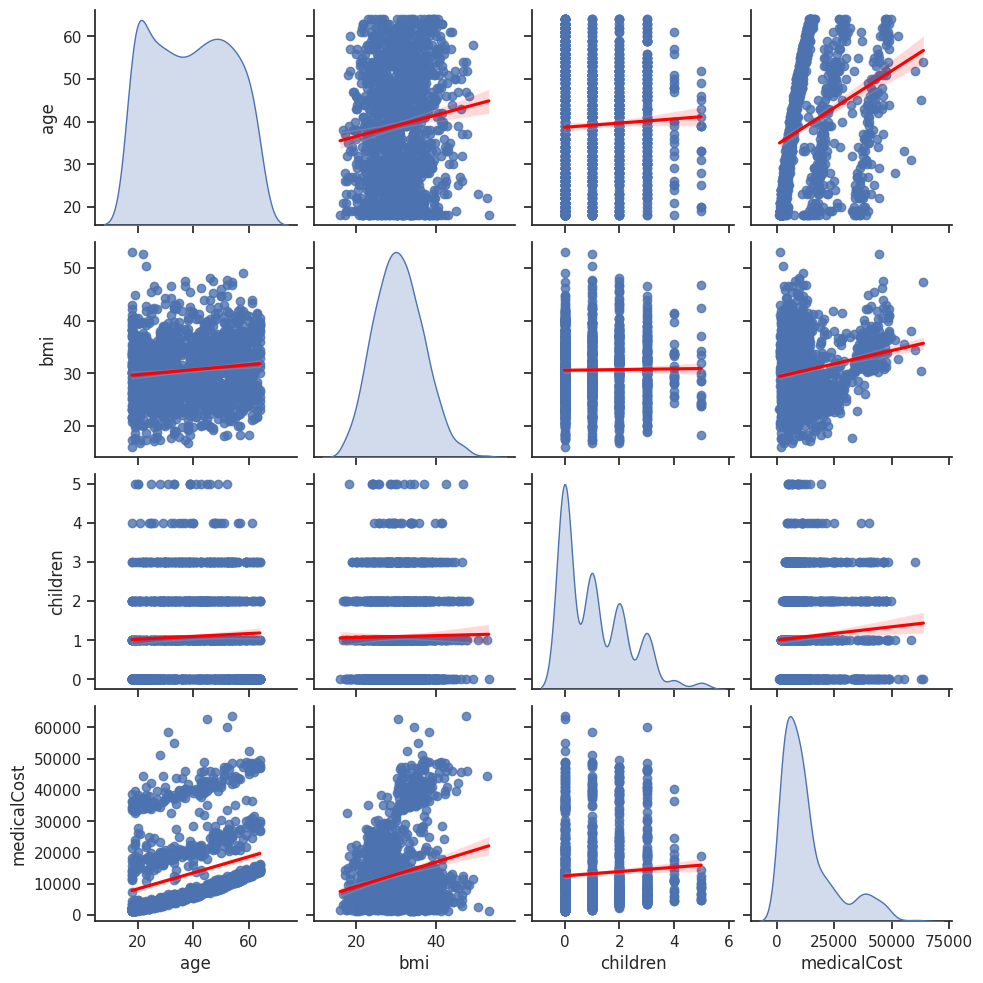

In [8]:
#Let's perform a pairplot vizualization to see how each vairable corrolate to each other
sns.set(style='ticks')
sns.pairplot(df_ene, diag_kind='kde', kind='reg', plot_kws={'line_kws':{'color':'red'}})

The pairplot with regression lines above provides insights into the relationships between each of the varaibles in the dataset. We can quickly identify patterns and relationships between the different pairs of features. We can also see from the visualization, those variables that have strong corrolations that could be potential predictors for building the desired regression model.

<Axes: xlabel='sex', ylabel='count'>

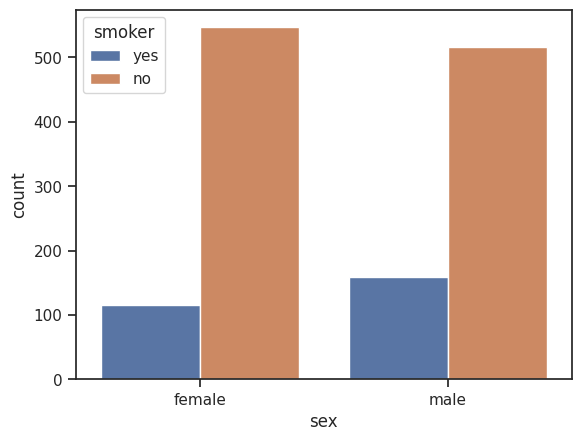

In [10]:
#Let's visualize which gender has the higher percentage of smokers
sns.set(style='ticks')
sns.countplot(data=df_ene, x='sex', hue='smoker')

The above visualization shows that males have the higher percentage of smokers in the dataset while the females are less smokers compared to the males

<Axes: xlabel='region', ylabel='count'>

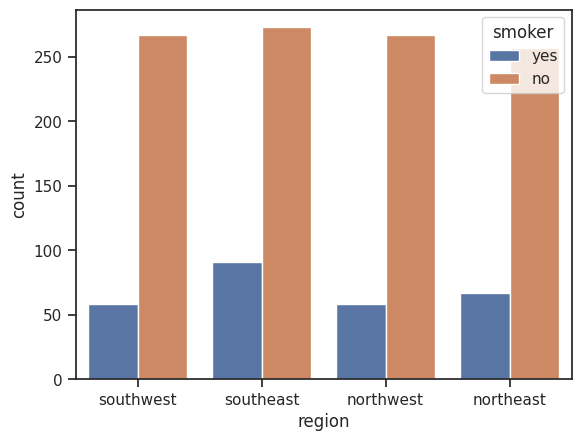

In [11]:
#Let's visualize regions with the highest percentage of smokers
sns.set(style='ticks')
sns.countplot(data=df_ene, x='region', hue='smoker')

We can decifer from this visualization that Southeast has more smokers whne compared to other regions while Southwest has the least number of smokers.

<Axes: xlabel='age', ylabel='Count'>

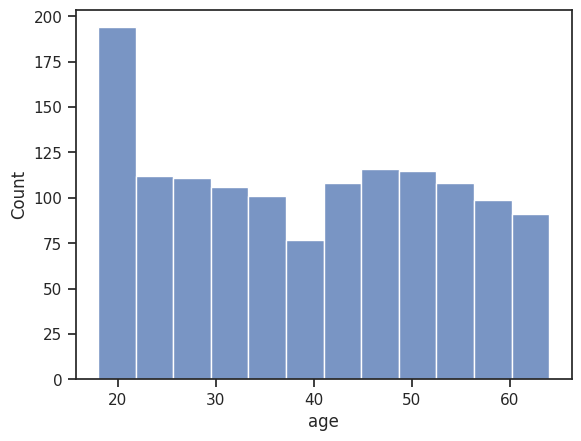

In [12]:
#Let's visualize the distribution of age in the dataset
sns.set(style='ticks')
sns.histplot(data=df_ene, x='age')

Our dataset reveals that there are more patients who are 20 years of age than other age group in the dataset.

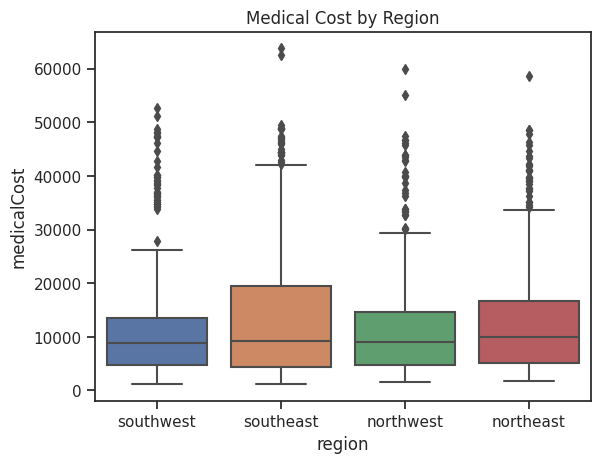

In [13]:
#Let's visualize regions with the highest medical Costs
sns.set(style='ticks')
sns.boxplot(data=df_ene, x='region', y='medicalCost')
plt.title('Medical Cost by Region')
plt.show()

Clearly, the Southeast region shows patients who spend the most for their medical expenses.

**b) Documenting Observations**


1.   There are more male smokers than there are female smokers
2.   Most of these smokers reside in the southeast region
3.   There are more adolescents than there are age description of other insurance patients
4.   Patients from the Southeast region spend more money for medical expenses than patients from other regions.
5.   patients from the Southwest spend less for medical expenses than other regions.   






##Convert Categorical Features to Numerical before carrying out correlation analysis##

In [18]:
#Let's perform a one hot encoding for the categorical features, sex, smoker and region
# Select the categorical columns to be encoded
categorical_columns = ['sex', 'smoker', 'region']

# Create an instance of the OneHotEncoder class and drop the first category for each feature to avoid collinearity issues
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform the selected categorical columns
encoded_features = encoder.fit_transform(df_ene[categorical_columns])

# Get the feature names after encoding
encoded_feature_names = encoder.get_feature_names_out(input_features=categorical_columns)

# Create a DataFrame from the encoded features
df_encoded = pd.DataFrame(encoded_features, columns=encoded_feature_names)

# Drop the original categorical columns from the original DataFrame
df_ene.drop(columns=categorical_columns, inplace=True)

# Concatenate the original DataFrame with the encoded DataFrame
encoded_df = pd.concat([df_ene, df_encoded], axis=1)

In [19]:
#Preview encoded dataset
encoded_df.head()

,age,bmi,children,medicalCost,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0.0,1.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,1.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,1.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,1.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,1.0,0.0,1.0,0.0,0.0


c) Study the correlation between each predictor and the medicalCost. What is your conclusion?

In [20]:
#Using a correlation matrix, let's calculate the correlation between each predictors and the label (medicalCost)
correlation_matrix = encoded_df.corr()
correlation_matrix

,age,bmi,children,medicalCost,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
medicalCost,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
sex_male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
smoker_yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


In [21]:
#Get the correlation values with the label (medicalCost)
correlation_with_label = correlation_matrix['medicalCost'].drop('medicalCost')
correlation_with_label

age                 0.299008
bmi                 0.198341
children            0.067998
sex_male            0.057292
smoker_yes          0.787251
region_northwest   -0.039905
region_southeast    0.073982
region_southwest   -0.043210
Name: medicalCost, dtype: float64

##Visualize the correlation of each predictors and the medicalCost##

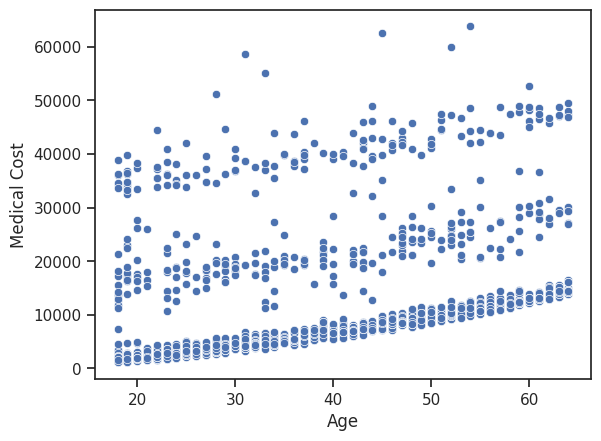

In [22]:
# Scatter plot for age vs. medicalCost
sns.set(style='ticks')
sns.scatterplot(x='age', y='medicalCost', data=encoded_df)
plt.xlabel('Age')
plt.ylabel('Medical Cost')
plt.show()

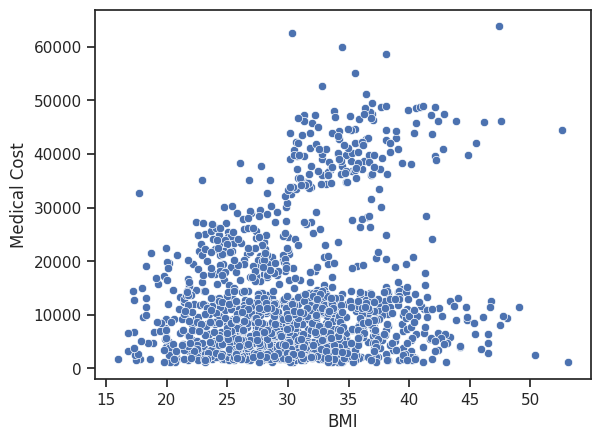

In [23]:
# Scatter plot for bmi vs. medicalCost
sns.scatterplot(x='bmi', y='medicalCost', data=encoded_df)
plt.xlabel('BMI')
plt.ylabel('Medical Cost')
plt.show()

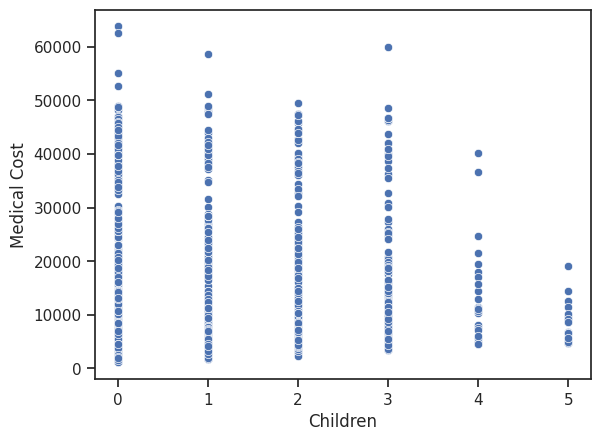

In [24]:
# Scatter plot for bmi vs. medicalCost
sns.set(style='ticks')
sns.scatterplot(x='children', y='medicalCost', data=encoded_df)
plt.xlabel('Children')
plt.ylabel('Medical Cost')
plt.show()

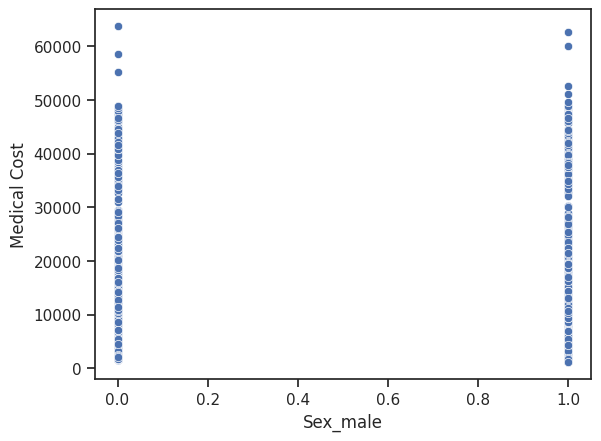

In [25]:
# Scatter plot for bmi vs. medicalCost
sns.set(style='ticks')
sns.scatterplot(x='sex_male', y='medicalCost', data=encoded_df)
plt.xlabel('Sex_male')
plt.ylabel('Medical Cost')
plt.show()

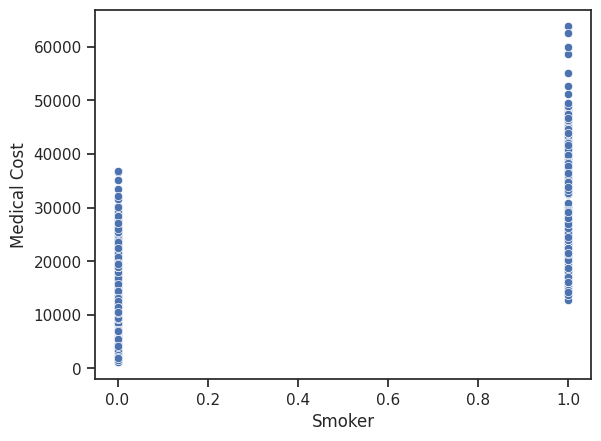

In [26]:
# Scatter plot for bmi vs. medicalCost
sns.set(style='ticks')
sns.scatterplot(x='smoker_yes', y='medicalCost', data=encoded_df)
plt.xlabel('Smoker')
plt.ylabel('Medical Cost')
plt.show()

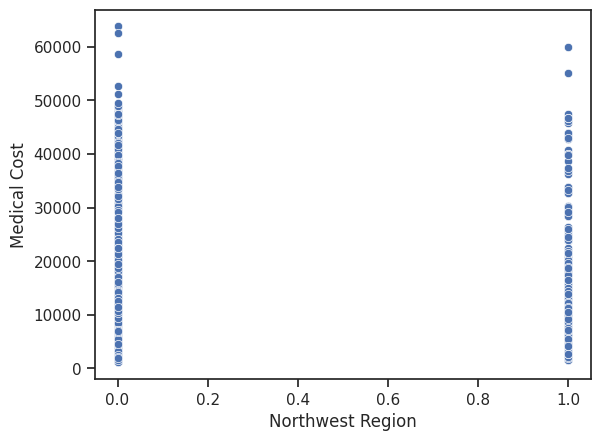

In [27]:

sns.set(style='ticks')
sns.scatterplot(x='region_northwest', y='medicalCost', data=encoded_df)
plt.xlabel('Northwest Region')
plt.ylabel('Medical Cost')
plt.show()

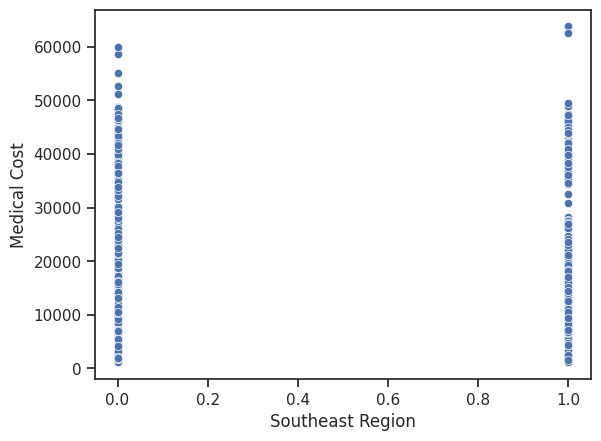

In [28]:
# Scatter plot for bmi vs. medicalCost
sns.set(style='ticks')
sns.scatterplot(x='region_southeast', y='medicalCost', data=encoded_df)
plt.xlabel('Southeast Region')
plt.ylabel('Medical Cost')
plt.show()

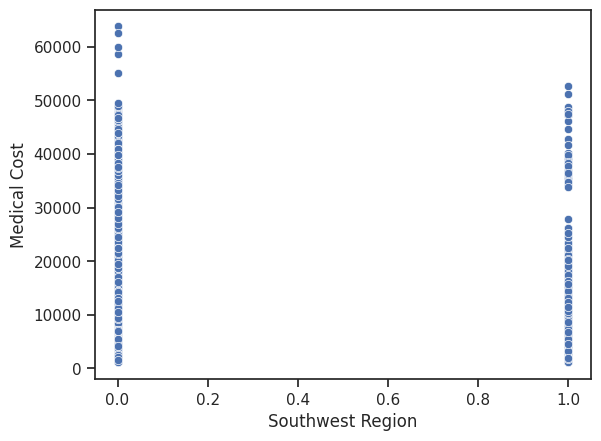

In [29]:
# Scatter plot for bmi vs. medicalCost
sns.set(style='ticks')
sns.scatterplot(x='region_southwest', y='medicalCost', data=encoded_df)
plt.xlabel('Southwest Region')
plt.ylabel('Medical Cost')
plt.show()

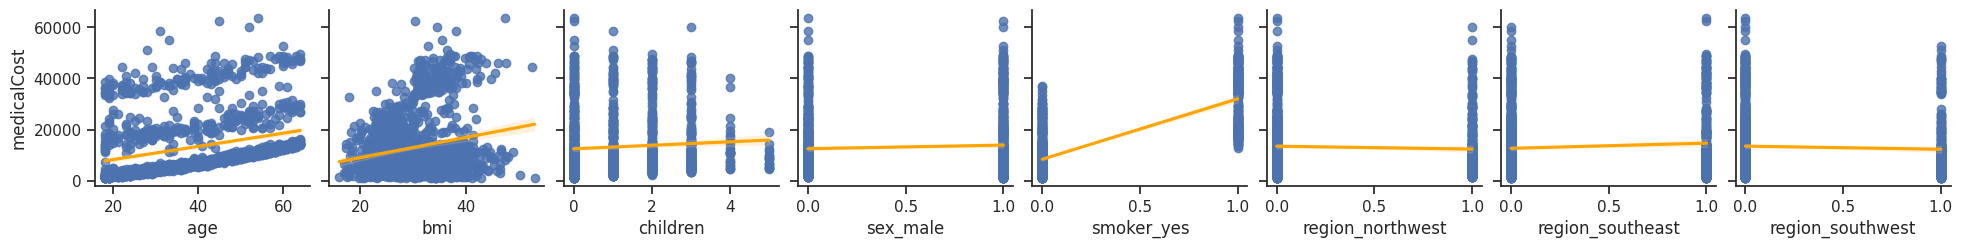

In [30]:
# Create a pairplot with scatter plots and regression lines for all numerical predictors
sns.set(style='ticks')
sns.pairplot(encoded_df, x_vars=['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest'], y_vars='medicalCost', kind='reg', plot_kws={'line_kws':{'color':'orange'}})
plt.show()

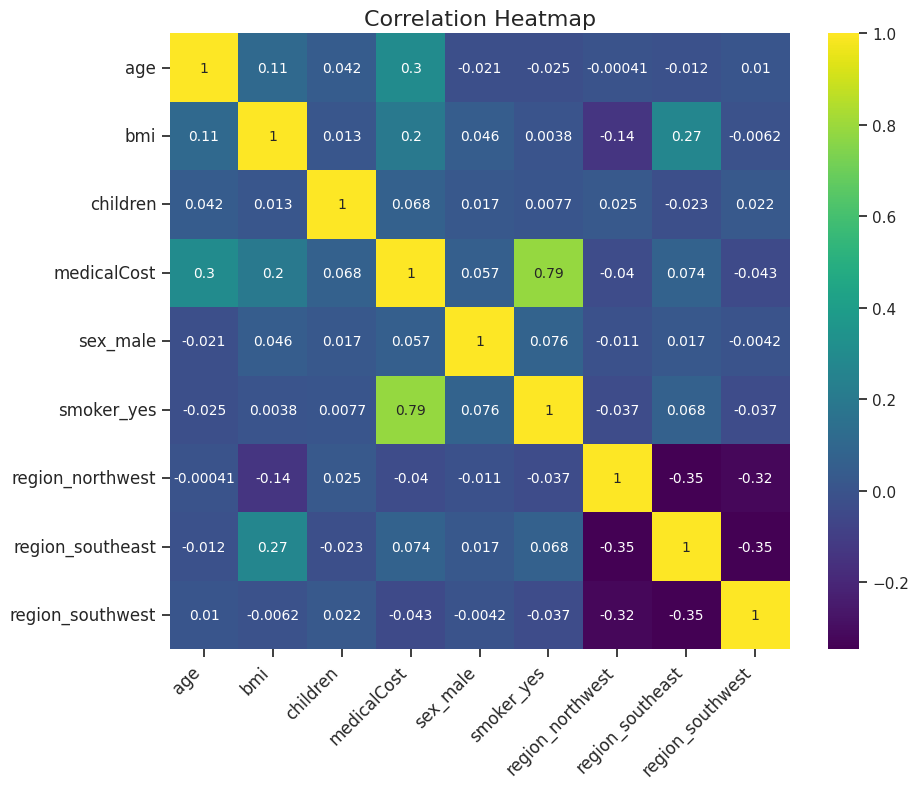

In [41]:
#correlation heatmap
sns.set(style='ticks')

# Set the figure size and resolution
fig, ax = plt.subplots(figsize=(10, 8), dpi=100)

# Create the heatmap using seaborn's heatmap function
sns.heatmap(encoded_df.corr(), cmap='viridis', annot=True, annot_kws={'size': 10}, ax=ax)

# Set tick labels
ax.set_xticklabels(encoded_df.corr().columns, rotation=45, ha='right', fontsize=12)
ax.set_yticklabels(encoded_df.corr().index, rotation=0, fontsize=12)

# Add a title
plt.title("Correlation Heatmap", fontsize=16)

# Show the plot
plt.show()

##Conclusion regarding the correlation between each predictor and the medicalCost##

All predictor corrolated positively with medicalCost except southwest and northwest  regions which have slight negative correlations with medicalCost.

Among the predictors with positive correlations, bmi, age and smoker in that order, correlated strongly to medicalCost!

**d) Use the correlation analysis to select 3 best predictors and build a simple linear regression model based on each of the predictors.**

In [35]:
#First, calculate the correlation coefficients and select the three best predictors
correlation_matrix = encoded_df.corr()
correlation_with_label = correlation_matrix['medicalCost'].drop('medicalCost')
top_three_predictors = correlation_with_label.abs().nlargest(3).index
top_three_predictors

Index(['smoker_yes', 'age', 'bmi'], dtype='object')

In [36]:
#Next, build Simple Linear Regression Models for each of the three predictors
for predictor in top_three_predictors:
    X = encoded_df[[predictor]]
    y = encoded_df['medicalCost']

    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Print the coefficients and intercept of the model
    print(f"Predictor: {predictor}")
    print("Coefficient:", model.coef_[0])
    print("Intercept:", model.intercept_)
    print("\n")

Predictor: smoker_yes
Coefficient: 23615.96353367666
Intercept: 8434.2682978562


Predictor: age
Coefficient: 257.72261866689564
Intercept: 3165.885006063021


Predictor: bmi
Coefficient: 393.87303079739524
Intercept: 1192.9372089611497




e) Evaluate the performance with the statistical performance measures to evaluate the statistical significance of your results.

In [37]:
#First, select the three best predictors identified earlier
top_three_predictors = ['bmi', 'smoker_yes', 'age']

# Separate the features (independent variables) and the label (dependent variable)
X = encoded_df[top_three_predictors]
y = encoded_df['medicalCost']

# Build separate simple linear regression models for each predictor
for predictor in top_three_predictors:
    X_individual = X[[predictor]]  # Select the current predictor in view as the only feature
    model = LinearRegression()
    model.fit(X_individual, y)

    # Make predictions
    y_pred = model.predict(X_individual)

    # Calculate MSE and R-squared
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    # Calculate F-statistic and its p-value using statsmodels
    X_individual_sm = sm.add_constant(X_individual)  # Add a constant term for intercept in statsmodels
    model_sm = sm.OLS(y, X_individual_sm).fit()
    f_statistic = model_sm.fvalue
    p_value = model_sm.f_pvalue

    # Print the performance metrics for the current predictor
    print(f"Predictor: {predictor}")
    print("Mean Squared Error (MSE):", mse)
    print("R-squared (R2):", r2)
    print("F-statistic:", f_statistic)
    print("p-value for F-statistic:", p_value)
    print("\n")

Predictor: bmi
Mean Squared Error (MSE): 140777900.09850758
R-squared (R2): 0.03933913991786264
F-statistic: 54.70930805463524
p-value for F-statistic: 2.459085535118864e-13


Predictor: smoker_yes
Mean Squared Error (MSE): 55720715.95418544
R-squared (R2): 0.6197648148218988
F-statistic: 2177.61486805652
p-value for F-statistic: 8.271435842181086e-283


Predictor: age
Mean Squared Error (MSE): 133440978.61376347
R-squared (R2): 0.08940589967885804
F-statistic: 131.17401258017003
p-value for F-statistic: 4.8866933317233075e-29




f) Build two multivariate regression models 1) with the three predictors above and 2) with all the predictors in the dataset. Evaluate and compare the two models.

In [40]:
#Build a multivariate regression models with the three predictors above

# Separate the features (independent variables) and the label (dependent variable)
X = encoded_df[top_three_predictors]
y = encoded_df['medicalCost']

# Split the data into training and testing sets
# Set the test_size and random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the multivariate linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error (MSE): 34512843.880227886
R-squared (R2): 0.7776932310583375
Coefficients: [  326.45023215 23675.37184666   259.41020462]
Intercept: -11707.802334583163


In [42]:
#Build a multivariate regression models with all the predictors in the dataset

# Select the three best predictors identified earlier
all_predictors = encoded_df.drop('medicalCost', axis=1)

# Separate the features (independent variables) and the label (dependent variable)
X = all_predictors
y = encoded_df['medicalCost']

# Split the data into training and testing sets
# Set the test_size and random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the multivariate linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error (MSE): 33596915.85136145
R-squared (R2): 0.7835929767120724
Coefficients: [ 2.56975706e+02  3.37092552e+02  4.25278784e+02 -1.85916916e+01
  2.36511289e+04 -3.70677326e+02 -6.57864297e+02 -8.09799354e+02]
Intercept: -11931.21905032666


##**Conclusion: Evaluation and comparison**##

Based on the model performabnces from both senarios above, the model with all predictors performed better than the model with three predictors since it has a lower MSE and a higher R-squared. This implies that the model with all predictors provides a better fit to the data and makes more accurate predictions compared to the model with the three predictors.

Note also, that the models with both "top_three_predictors" and "all_predictors" out performed the models for the individual predictors in questions (d) with evaluation in (e) above!